In [2]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans

In [3]:
# загрузим данные
df = pd.read_csv('Data/pokemon.csv')
# датасет содержит имя покемона, силу его защиты, атаки и скорость
display(df.head())

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


## k-means кластеризация

<Axes: xlabel='Attack', ylabel='Defense'>

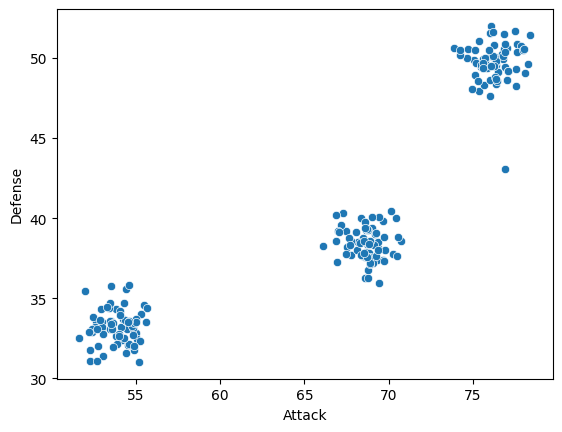

In [4]:
# попробуем кластеризовать покемонов по их силе атаки и защиты
# для этого сохраним в матрицу X 2 интересующих признака: атаку и защиту
X = df[['Attack', 'Defense']]

# визуализируем
sns.scatterplot(x=df.Attack, y=df.Defense)

Теперь инициализируем алгоритм k-means. Для этого зададим:

- n_clusters - количество кластеров  

- init - стратегию кластеризации  

- n_init - количество запусков алгоритма k-means  

- random_state - для того, чтобы результаты от запуска к запуску воспроизводились  

array([0, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1,
       0, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0,
       0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2,
       2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 1], dtype=int32)

array([0, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1,
       0, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0,
       0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2,
       2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 1], dtype=int32)

<Axes: xlabel='Attack', ylabel='Defense'>

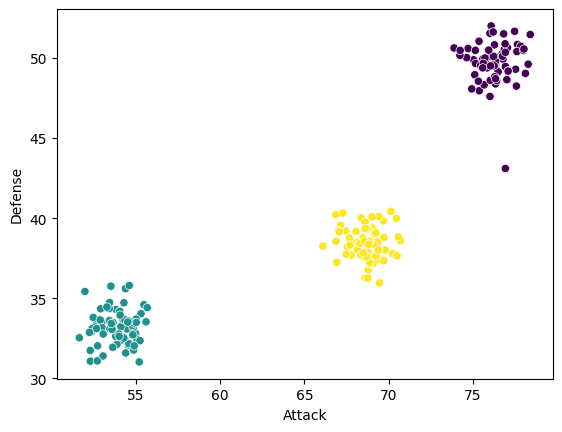

In [5]:
# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
display(predictions)

# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_
display(predictions)

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

В данном случае видно, что данные хорошо делятся на три кластера, а также есть одна точка-выброс. 

Попробуем увеличить количество кластеров до четырёх, чтобы вынести выброс в отдельный кластер:

<Axes: xlabel='Attack', ylabel='Defense'>

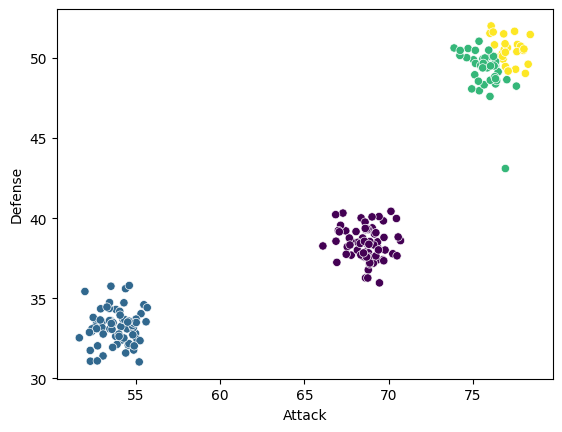

In [6]:
# инициализируем алгоритм k-means, с количеством кластеров 4
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_k4)

Как видим, «отделить» выброс от других данных не получается: k-means не умеет обрабатывать выбросы.

В данном случае мы проводили кластеризацию по двум признакам. Мы сделали это для того, чтобы можно было визуализировать результаты. Для кластеризации можно использовать и более двух признаков, однако в таком случае кластеризация будет проходить в n-мерном пространстве (для трёх признаков пространство будет трёхмерным), и визуализировать результаты будет непросто.

В трёхмерном и другом n-мерном случае кластеризация запускается следующим образом:

In [7]:
# добавляем третий признак - скорость покемона, а алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]

# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3_2d'] = predictions

## Выбор количества кластеров с помощью метода локтя

<Axes: xlabel='cluster', ylabel='inertia'>

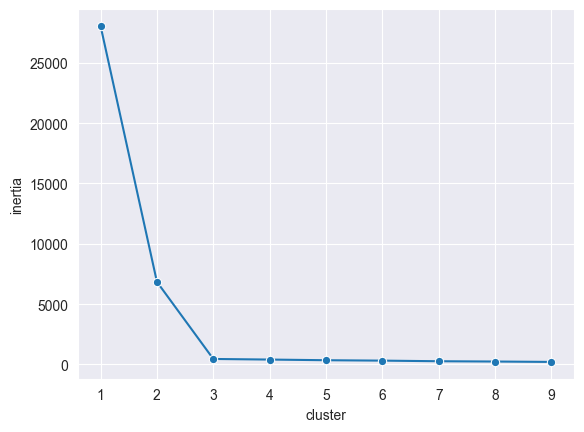

In [8]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов,и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создадим пустой словарь, ключами будут инерция и количество кластеров
res = {"inertia": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

# итерируемся по разным размерам кластеров (от 1 до 9) и сохраним значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    res["inertia"].append(get_inertia(cluster_num, X))
    res["cluster"].append(cluster_num)

# сохраним в датафрейм значение инерции и количество кластеров
res_df = pd.DataFrame(res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=res_df, x="cluster", y="inertia", marker= "o")

Если вдруг в ходе работы вы встречаете график, на котором невозможно найти «локоть», на помощь придёт коэффициент силуэта.

## Выбор количества кластеров с помощью коэффициент силуэта

<Axes: xlabel='cluster', ylabel='silhouette'>

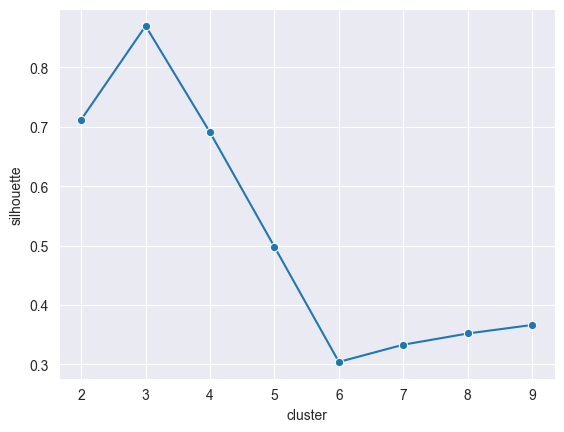

In [9]:
# импортируем метрику силуэт
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

График силуэта, в отличие от графика локтя, имеет пиковый характер, поэтому его проще визуализировать и анализировать.

Если нужно найти оптимальное количество кластеров для датасета, наиболее наглядным графиком будет график коэффициента силуэта, поэтому можно сразу воспользоваться им. Но стоит помнить, что для построения данного графика нужно минимум два кластера, так как мы сравниваем объекты одного кластера с другим, наиболее близким кластером.

## Метрики

In [10]:
# импортируем подсчет метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию к какому кластеру относятся объекты датасета и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

print(homogeneity_score(labels_true=[1, 1, 0, 0], labels_pred=[1, 1, 0, 0]))

1.0
1.0


In [11]:
# теперь посчитаем насколько однородными получились кластеры с покемонами
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
1.0


In [12]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаем предсказанную информацию к какому кластеру относятся объекты датасета и правильные ответы, подсчитываем метрику
print(completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

1.0


In [13]:
# посчитаем насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

# посчитаем насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.8334191510029214


In [14]:
# импортируем из библиотеки sklearn подсчет v-меры
from sklearn.metrics import v_measure_score

# теперь посчитаем v-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.9091419717602737


In [15]:
# импортируем из библиотеки sklearn подсчет индекса Рэнда
from sklearn.metrics.cluster import rand_score

# теперь посчитаем насколько полными получились кластеры с покемонами
print(rand_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(rand_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.9482832109874497


### Практика

Вам как специалисту по анализу данных поступили показания с прибора (values_from_the_instrument.csv), измеряющего количество нитратов и пестицидов в разных фруктах и овощах.

Значения количества пестицидов и нитратов записаны в столбцы с названиями x1 и x2.

Основываясь на этих двух свойствах, кластеризуйте данные и, используя коэффициент силуэта, найдите оптимальное количество кластеров.

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278
...,...,...
995,64.147007,59.058766
996,48.973928,67.454876
997,62.605739,58.633415
998,47.122895,67.308920


<Axes: xlabel='cluster', ylabel='silhouette'>

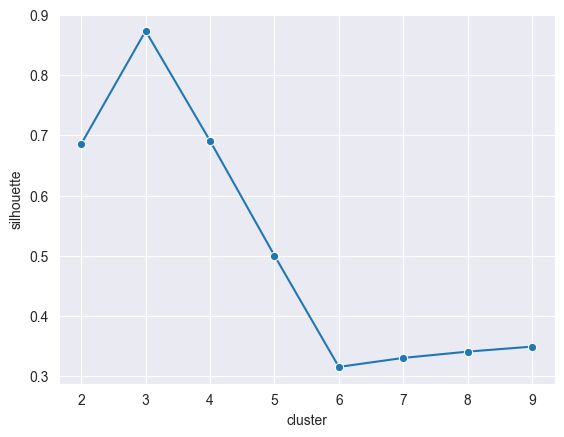

In [16]:
df = pd.read_csv('Data/values_from_the_instrument.csv')
display(df)

# импортируем метрику силуэт
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные
X = df[['x1', 'x2']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

## Юнит 2. Другие методы кластеризации

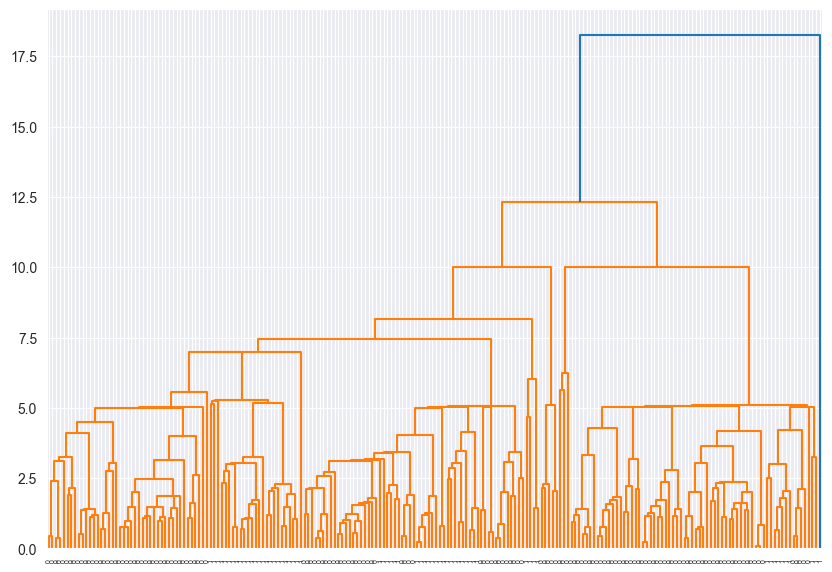

In [17]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# загрузим данные
df = pd.read_csv('Data/pokemon.csv')

# добавляем третий признак - скорость покемона, а алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]

# инициализируем алгоритм k-means, с количеством кластеров 3
agglomerative_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')

# запустим обучение модели
agglomerative_clustering.fit(X)

# получаем метки c информацией, к какому кластеру относятся объекты
agglomerative_clustering.labels_

# Визуализация дендрограммы
linked = linkage(X, 'single')

plt.figure(figsize=(10, 7))

dendrogram(linked,
            orientation='top',
            labels=agglomerative_clustering.labels_,
            distance_sort='descending',
            show_leaf_counts=True)

plt.show()

In [18]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# запускаем агломеративную кластеризацию
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)

# обучаем модель
agglomerative_clustering.fit(X)

# получаем метки c информацией, к какому кластеру относятся объекты
agglomerative_clustering.labels_

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0])

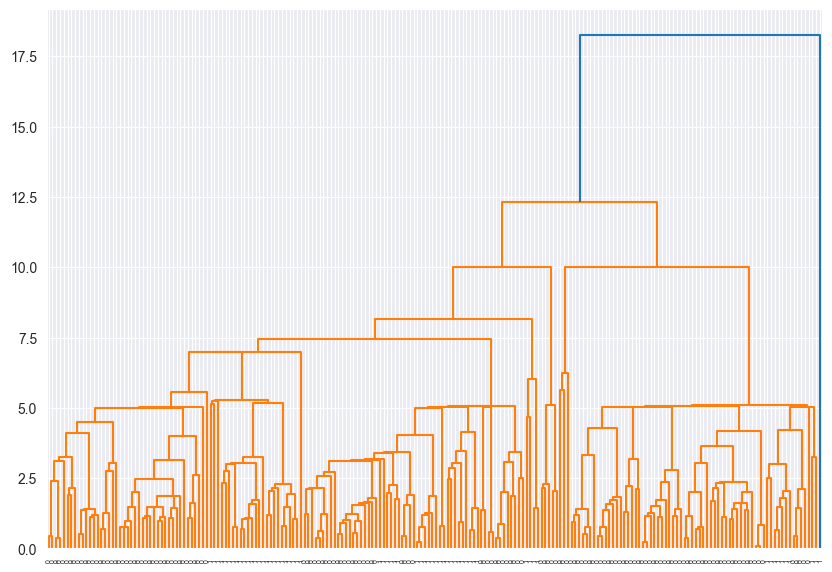

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

plt.figure(figsize=(10, 7))

dendrogram(linked,
            orientation='top',
            labels=agglomerative_clustering.labels_,
            distance_sort='descending',
            show_leaf_counts=True)

plt.show()

## GMM кластеризация

In [20]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

<Axes: xlabel='Attack', ylabel='Defense'>

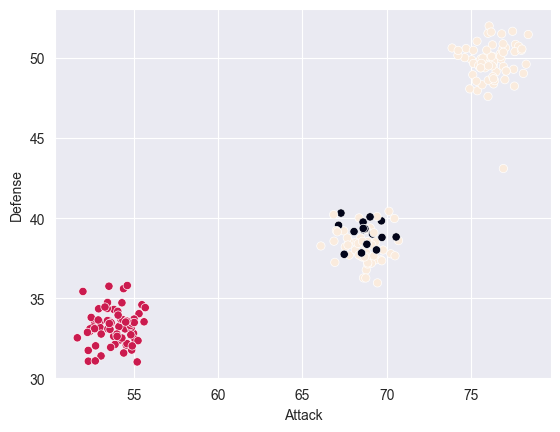

In [21]:
# sns.set_style("white")
sns.scatterplot(x=df.Attack, y=df.Defense, c=gm_prediction)

## Спектральная кластеризация

In [22]:
df

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1
...,...,...,...,...,...,...,...,...,...
201,Skiddo,350,66,75.932190,50.498392,62,57,52,2
202,Gogoat,531,123,76.919520,50.361511,97,81,68,2
203,Clauncher,330,50,76.038055,49.515184,58,63,44,2
204,Clawitzer,500,71,66.854449,40.217467,120,89,59,1


In [23]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering

# запускаем кластеризацию 
spectral_clustering = SpectralClustering(n_clusters=4, n_init=1500, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

<Axes: xlabel='Attack', ylabel='Defense'>

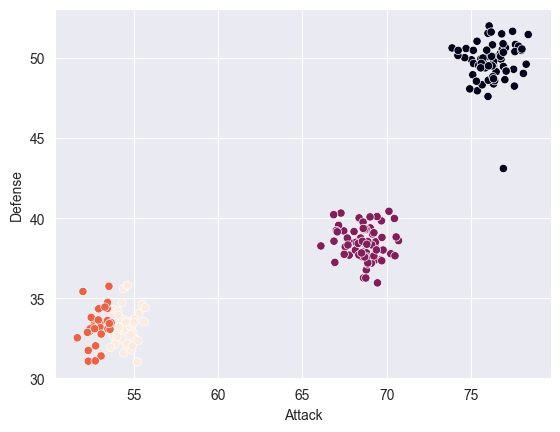

In [24]:
sns.scatterplot(x=df.Attack, y=df.Defense, c=spectral_predictions)

Основные параметры SpectralClustering:

- n_clusters — количество кластеров; по умолчанию — 8.
- random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску необходимо передать какое-то число.

Как мы можем заметить, спектральная кластеризация так же, как и другие типы кластеризации, не справляется с выбросами и не выделяет их в отдельный кластер. К сожалению, этот недостаток алгоритма нельзя исправить.

## DBSCAN (кластеризация на основе плотности)

In [25]:
df

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1
...,...,...,...,...,...,...,...,...,...
201,Skiddo,350,66,75.932190,50.498392,62,57,52,2
202,Gogoat,531,123,76.919520,50.361511,97,81,68,2
203,Clauncher,330,50,76.038055,49.515184,58,63,44,2
204,Clawitzer,500,71,66.854449,40.217467,120,89,59,1


<Axes: xlabel='Attack', ylabel='Defense'>

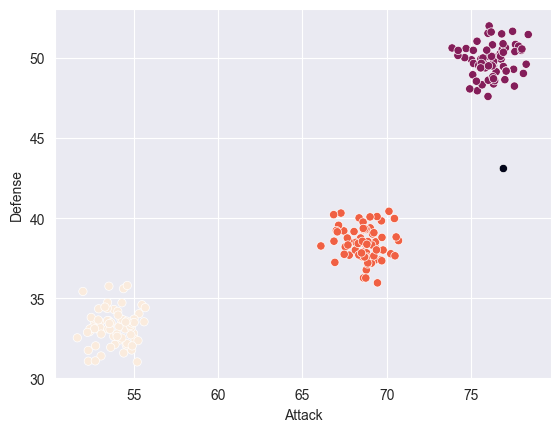

In [26]:
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=2, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_)

### Основные параметры для запуска DBSCAN:

- eps — это радиус, про который мы говорили выше, когда рассматривали алгоритм. Это один из важнейших параметров в алгоритме DBSCAN. Попробуйте изменять его и посмотрите, как будут меняться кластеры в зависимости от значения параметра. Если данные разрежённые, значение радиуса должно быть больше. Если же данные расположены довольно близко друг к другу, значение радиуса можно уменьшить.
- min_samples — задаёт минимальное количество точек, которое должно быть в заданном радиусе от точки, чтобы она считалась центральной.

### Практика

В датасете (housing.csv) представлены цены на однокомнатные квартиры и возраст этих квартир. Проведите кластеризацию GMM, используя два признака: цену и возраст квартир. Какое оптимальное количество кластеров получилось?

In [27]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

df = pd.read_csv('Data/housing.csv')
display(df.info())

X = df[['year', 'price']]

bic_values = []
for n_clusters in range(1, 10):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(X)
    bic_values.append(gmm.bic(X))
    
optimal_clusters = range(1, 10)[bic_values.index(min(bic_values))]
print(f"Оптимальное количество кластеров: {optimal_clusters}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1355 non-null   float64
 1   price   1355 non-null   float64
dtypes: float64(2)
memory usage: 21.3 KB


None

Оптимальное количество кластеров: 3


Для датасета из предыдущего задания проведите кластеризацию с помощью алгоритма k-means. Какой алгоритм справился с задачей лучше?

In [28]:
# Загрузка данных из CSV-файла
df = pd.read_csv('Data/housing.csv')

# Создание массива данных для кластеризации, содержащего только столбцы 'year' и 'price'
X = df[['year', 'price']]  # Извлечение столбцов 'year' и 'price' из DataFrame df

# Инициализация и обучение модели K-means
k_means = KMeans(n_clusters=3,  # Определение 3 кластеров
                 init='k-means++',  # Использование алгоритма k-means++ для инициализации центроидов
                 n_init=10,  # Количество попыток инициализации
                 random_state=42)  # Использование фиксированного случайного состояния
k_means.fit(X)  # Обучение модели K-means на данных X

# Инициализация и обучение Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3,  # Определение 3 компонентов смеси Гаусса
                      random_state=42)  # Использование фиксированного случайного состояния
gmm.fit(X)  # Обучение модели GMM на данных X

# Прогнозирование меток кластеров для GMM
labels_gmm = gmm.predict(X)  # Получение предсказанных меток кластеров для данных X

# Вычисление метрики Silhouette для K-means и GMM
score_kmeans = silhouette_score(X, k_means.labels_)  # Метрика Silhouette для K-means
score_gmm = silhouette_score(X, labels_gmm)  # Метрика Silhouette для GMM

# Вывод оценок метрики Silhouette
print(f"K-Means Silhouette Score: {score_kmeans}")
print(f"GMM Silhouette Score: {score_gmm}")

K-Means Silhouette Score: 0.6717603105505034
GMM Silhouette Score: 0.6650326356281008


Для датасета с ценами квартир проведите кластеризацию DBSCAN с параметрами по умолчанию. Визуализируйте результаты. Сколько точек было размечено как выбросы?

<Axes: xlabel='year', ylabel='price'>

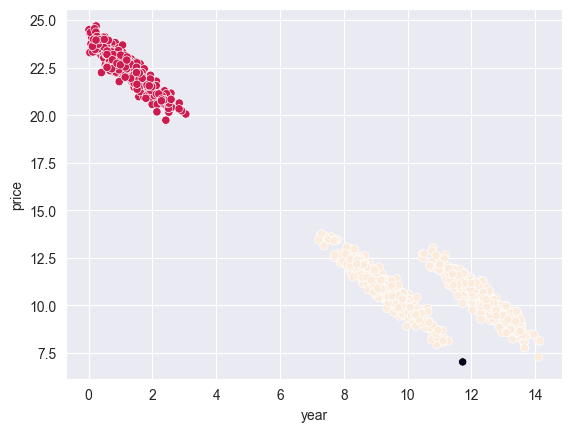

In [29]:
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

df = pd.read_csv('Data/housing.csv')

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=1.15, min_samples=2).fit(df[['year', 'price']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(x=df.year, y=df.price, c=clustering.labels_)